In [2]:
# import library tensorflow
import tensorflow as tf

In [4]:
# load data 
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
#Define trining and test, also label image
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [7]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
#Normalize the pixel values
# so the pixel will be distributed in rangge 0-1
training_images = training_images/255.0
test_images = test_images/255.0

In [10]:
training_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Glosarium
- Sequential = kerangka model neural network berlapis
- Flatten = Mengkalikan semua nilai dimensi dan memadatkannya menjadi satu dimensi
- Dense = satu lapisan neuron yang memaksa input akan memiliki output yang sesuai dengan node neuron tersebut
- activation = ketentuan model yang mengkondisikan nilai setiap inputnya
- optimizer = ketentuan weight dalam prosesnya menghasilkan output agar loss nya mendekati nilai aktualnya

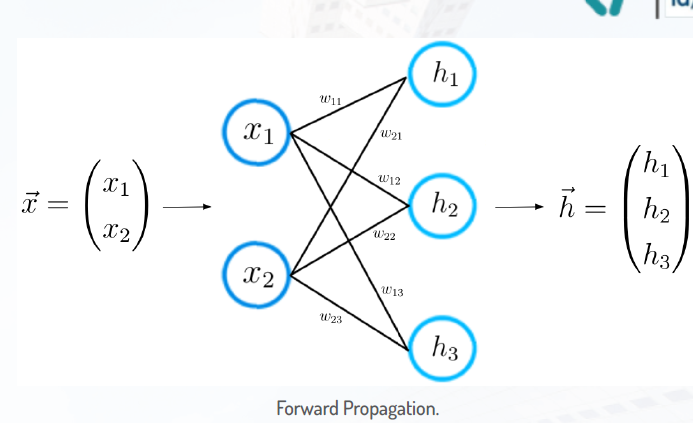

# Shallow Neural network

In [11]:
# Define model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])

In [14]:
#setup Training parameter
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Train model
print(f'Model Training:')
model.fit(training_images, training_labels, epochs = 5)

Model Training:
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4942 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8908


In [19]:
#evaluate model using test set
print(f'Model Evaluate:')
test_loss = model.evaluate(test_images, test_labels)

Model Evaluate:
313/313 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8750


# CNN (Convolutional Neural Network)
- Conv2D = Mengkovolusikan input dengan menbahkan  filter (dimensi/node yang dibutuhkan)
- Maxpooling = mengambil nilai terbesar dalam suatu ordo matriks yang merepresentasikan unit gambar

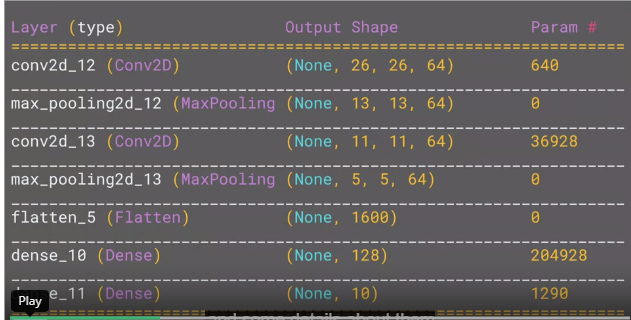

In [52]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [53]:
model = tf.keras.models.Sequential([
    #Add convolution and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #Add shallow layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
                                   ])

In [54]:
#Model Summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [55]:
# compile model
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
print(training_images.shape, training_labels.shape)

(60000, 28, 28) (60000,)


In [57]:
#train_dataset= train_dataset.reshape(-1,32,32,1)
training_images = training_images.reshape(-1,28,28,1)
training_images.shape

(60000, 28, 28, 1)

In [58]:
#Train model 
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5715 - accuracy: 0.8186
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3423 - accuracy: 0.8744
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2977 - accuracy: 0.8905
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2728 - accuracy: 0.8987
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2536 - accuracy: 0.9045


In [61]:
test_images = test_images.reshape(-1,28,28,1)

In [62]:
test_images.shape

(10000, 28, 28, 1)

In [63]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 3s 8ms/step - loss: 0.3277 - accuracy: 0.8840


It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a Conv2D layer. The parameters are:

The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
The size of the Convolution. In this case, a 3x3 grid.
The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
In the first layer, the shape of the input data.
You'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
Then you added another convolution and flattened the output.

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
After this, you'll just have the same DNN structure as the non convolutional version. The same 128 dense layers, and 10 output layers as in the pre-convolution example:

  tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax')
])
About overfitting
Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called overfitting. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

# Visualizing the Convolutions and pooling
Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination

In [64]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


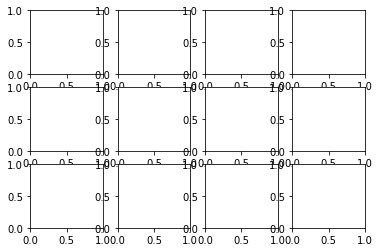

In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axrr = plt.subplots(3,4)

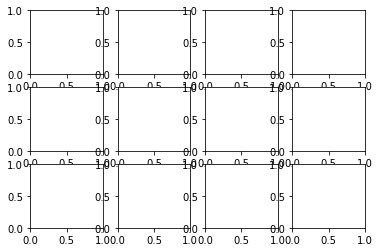

In [73]:
f

In [74]:
axrr

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

In [76]:
first_img = 0
second_img = 23
third_img = 28
convolution_numb = 1
layer_outputs = [layer.output for layer in model.layers]

In [79]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [80]:
activation_model

In [81]:
layer_outputs

[<tf.Tensor 'conv2d_20/Relu:0' shape=(None, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_20/MaxPool:0' shape=(None, 13, 13, 32) dtype=float32>,
 <tf.Tensor 'conv2d_21/Relu:0' shape=(None, 11, 11, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_21/MaxPool:0' shape=(None, 5, 5, 32) dtype=float32>,
 <tf.Tensor 'flatten_10/Reshape:0' shape=(None, 800) dtype=float32>,
 <tf.Tensor 'dense_20/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_21/Softmax:0' shape=(None, 10) dtype=float32>]

In [85]:
for x in range(0,4):
  f1 = activation_model.predict(test_images[first_img].reshape(1, 28, 28, 1))[x]
  axrr[0,x].imshow(f1[0, : , :, convolution_numb], cmap='inferno')
  axrr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[second_img].reshape(1, 28, 28, 1))[x]
  axrr[1,x].imshow(f2[0, : , :, convolution_numb], cmap='inferno')
  axrr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[third_img].reshape(1, 28, 28, 1))[x]
  axrr[2,x].imshow(f3[0, : , :, convolution_numb], cmap='inferno')
  axrr[2,x].grid(False)
plt.show()

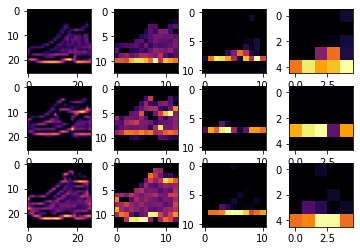

In [91]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 2

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [92]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

In [93]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_25 (Dense)             (None, 10)              